# Introduzione a matplotlib

Matplotlib is a python library used for publication quality plots. It's widely use because it's flexibility and its simple apis. It's also very well integrated with the jupyter notebook environment so that is possible to create both static plots and dynamic ones

## Magic notebook command

Magic commands are lines in a code cell that starts with `%`. There are three magic cells for matplotlib and that can be called before importing the library or when you want to control the display of a plot in a cell

* `%matplotlib inline` is used for printing static plot images
* `%matplotlib notebook` is used for print interactive plots
* `%matplotlib agg` is like inline but doesn't print explicitly the plots

In [1]:
# we will use inline plotting
%matplotlib inline

In [2]:
# Import the library
import matplotlib.pyplot as plt

Let's look at the simplest example of plot

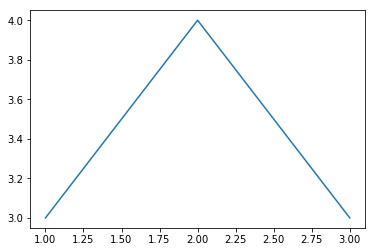

In [3]:
x = [1, 2, 3]
y = [3, 4, 3]
plt.plot(x, y);

Drawing a plot is very easy. With a line of code it is possible to call the function to print the plot

**Careful**: if you use matplotlib from a .py script file and you want to plot the results on the screen you should always call the `plt.show()` function at the end

```python
plt.plot(x, y)
plt.show()
```

The first thing you can notice is that the image is a little bit to tiny wih respect of the notebook width. Let's see how to customize the width and height that will be printed from now on

In [4]:
import matplotlib as mpl
# .rc is the function used to configure the global plotting parameters
# figsize is expressed in dots
# dpi means dots per inch
mpl.rc('figure', figsize=(8, 4), dpi=150)

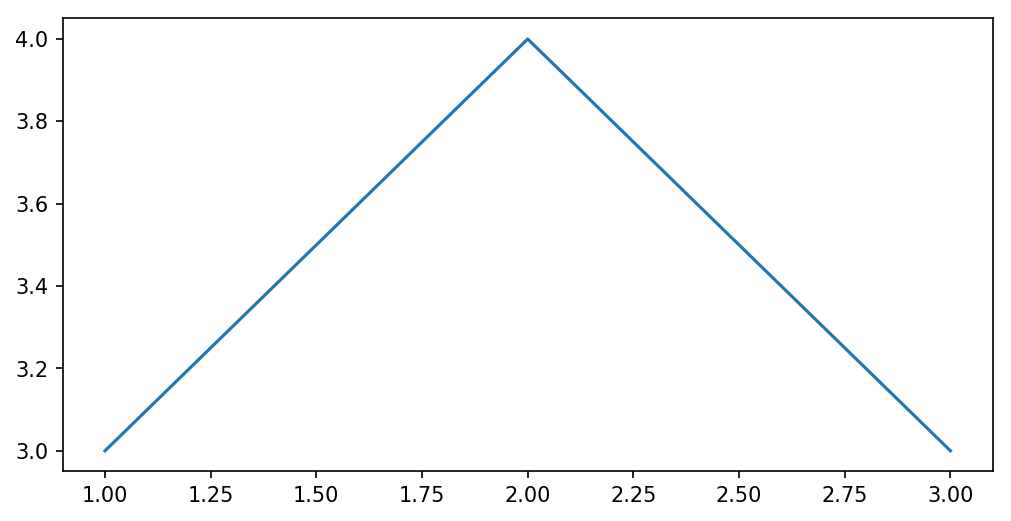

In [5]:
plt.plot(x, y);

It's also possible to manipulate the objects representing the plot's parts. This is very handy when you have to deal with lots of plots and wants to control them better.

In matplotlib there are two main objects that define what you see:
* Figure
* Axes
The figure is like a canvas. The axes represents the part of the canvas on which you put data. This means that each time you are drawing something, you're putting data on axes laying on a canvas

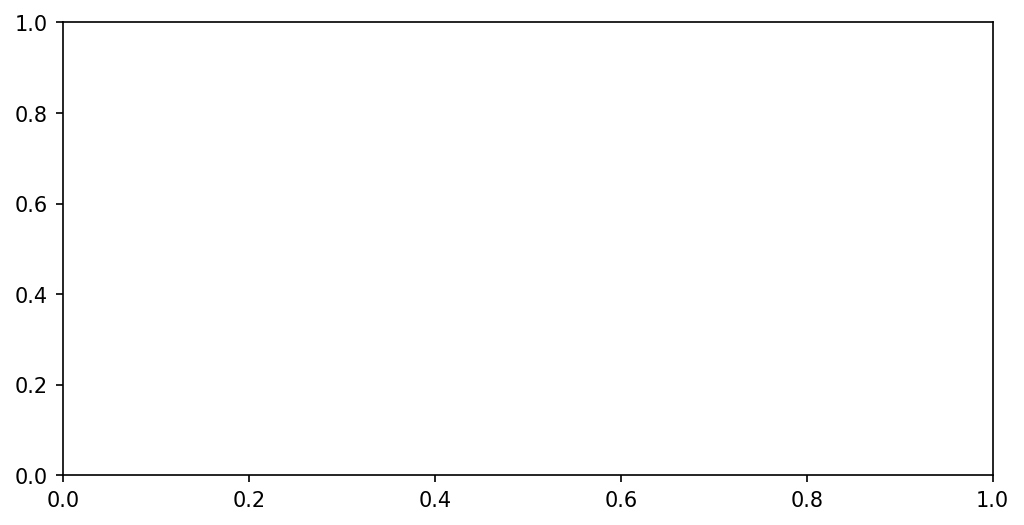

In [6]:
# Simplest way to create fig and axes objects
fig, ax = plt.subplots()

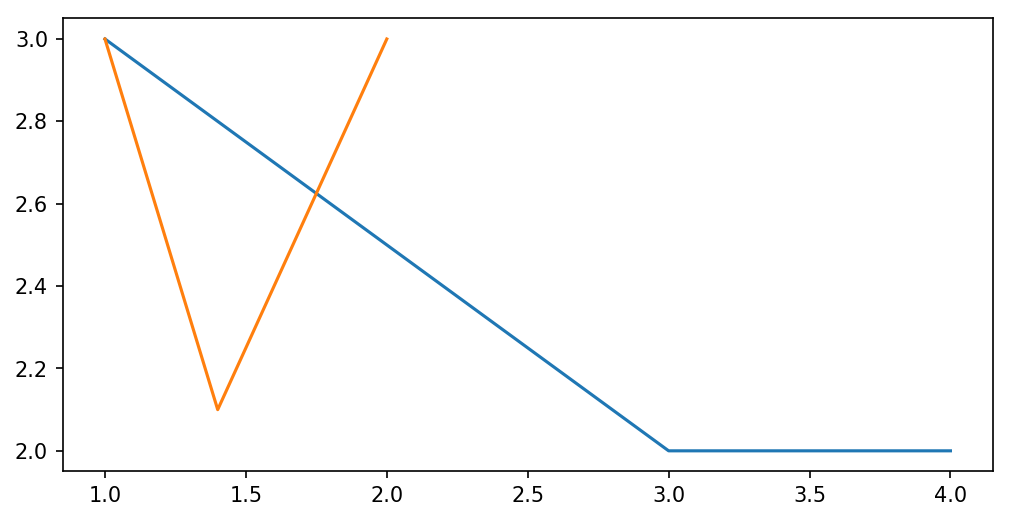

In [7]:
# When you have an instance of Axes you can draw on them
fig, ax = plt.subplots()
ax.plot([1, 3, 4], [3, 2, 2])
ax.plot([1, 1.4, 2], [3, 2.1, 3]);

## Plot configuration

Let's see how to configure and customize a plot

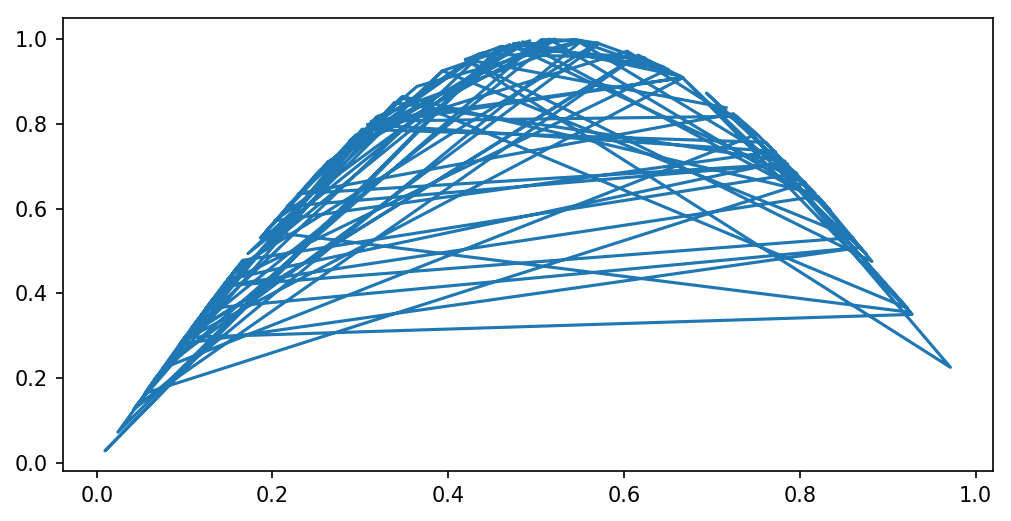

In [8]:
import numpy as np  # used for random number generator

x = np.random.random(100)
y = np.sin(x * 3)

plt.plot(x, y);

As you can see, the lines are all interesecating. This is due to the fact that `x` is a variable containing random numbers that are not sorted.

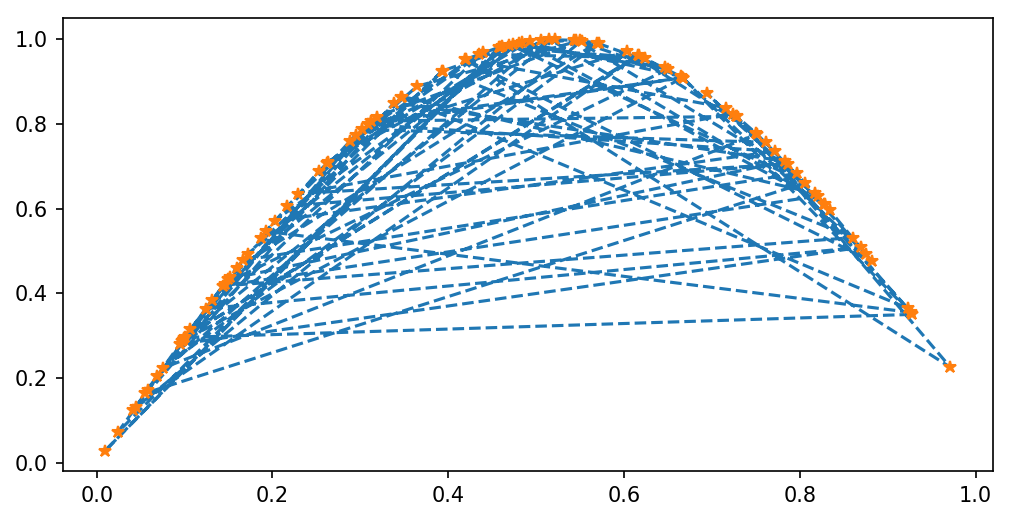

In [9]:
plt.plot(x, y, '--')  # plot with dashed lines
plt.plot(x, y, '*');  # plot with only stars as markers and no lines

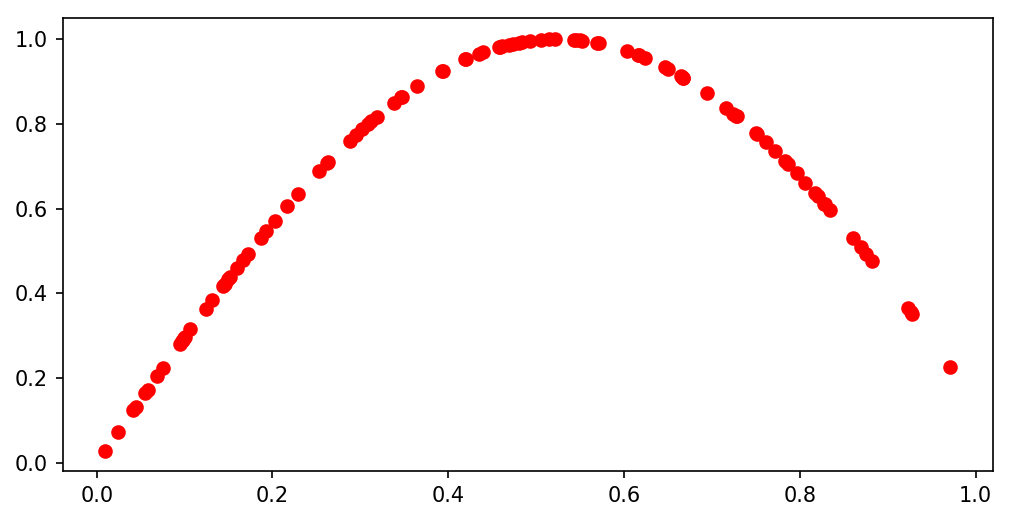

In [10]:
plt.plot(x, y, 'ro');  # r is for red and o for circle

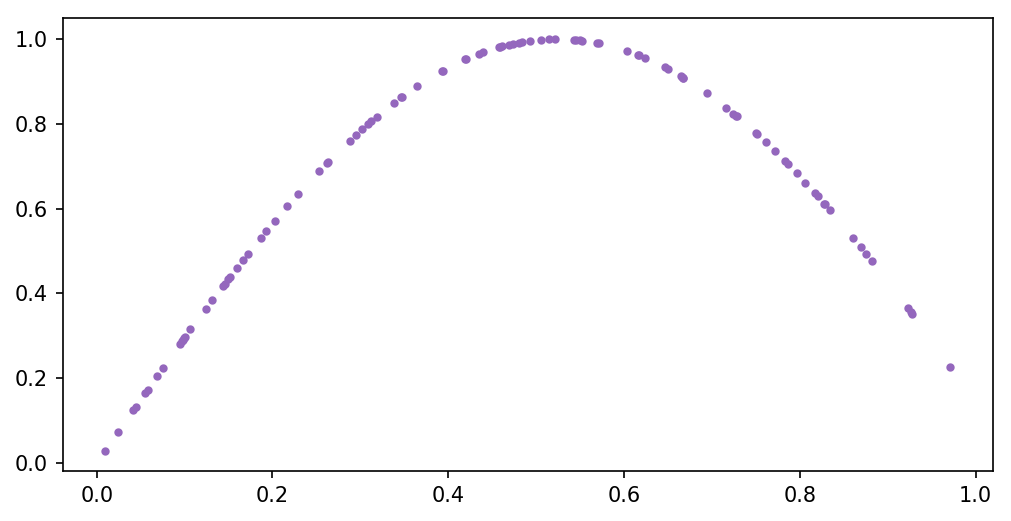

In [11]:
plt.plot(x, y, 'C4.');  # C0, C1, C2, ..., C9 are predefined colors
# the '.' represents a small dot

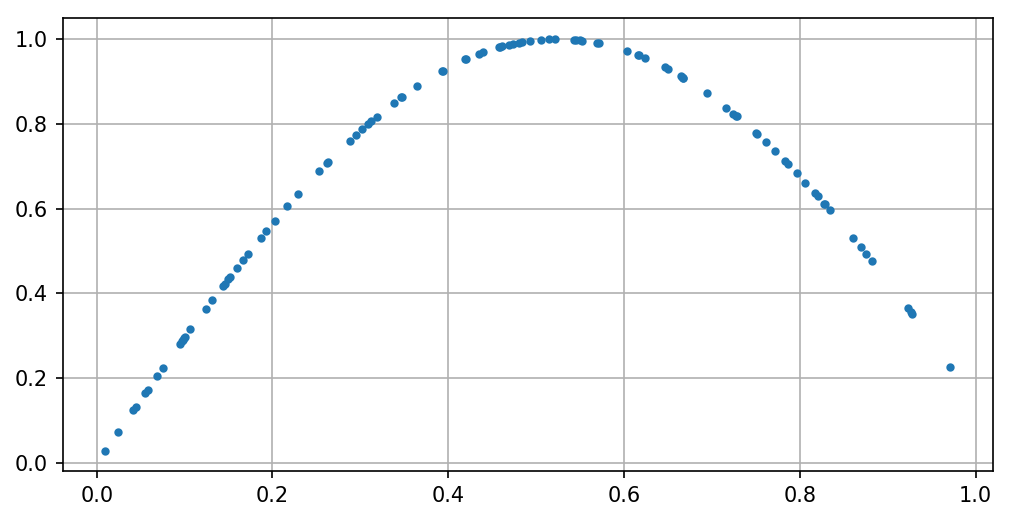

In [12]:
plt.plot(x, y, '.')
plt.grid(); # Let's add a grid

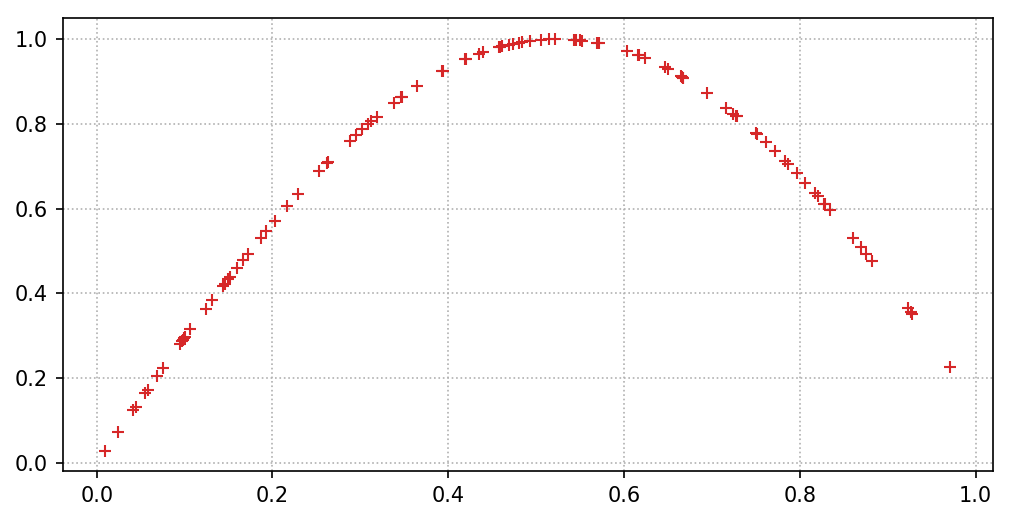

In [13]:
# Let's add a dashed grid
plt.plot(x, y, 'C3+')
plt.grid(linestyle=':')

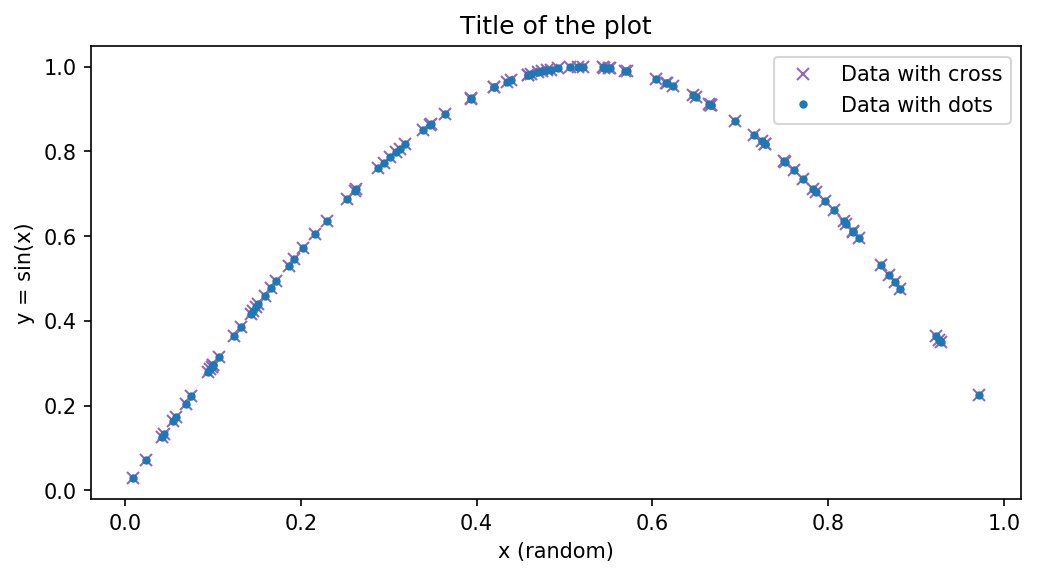

In [14]:
# Let's add some text to the plot
plt.plot(x, y, 'C4x', label='Data with cross')  # label is used for the legend
plt.plot(x, y, '.', label='Data with dots')

plt.title('Title of the plot')
plt.xlabel('x (random)')
plt.ylabel('y = sin(x)')
plt.legend();  # enables legend

You can also use latex formula within the text

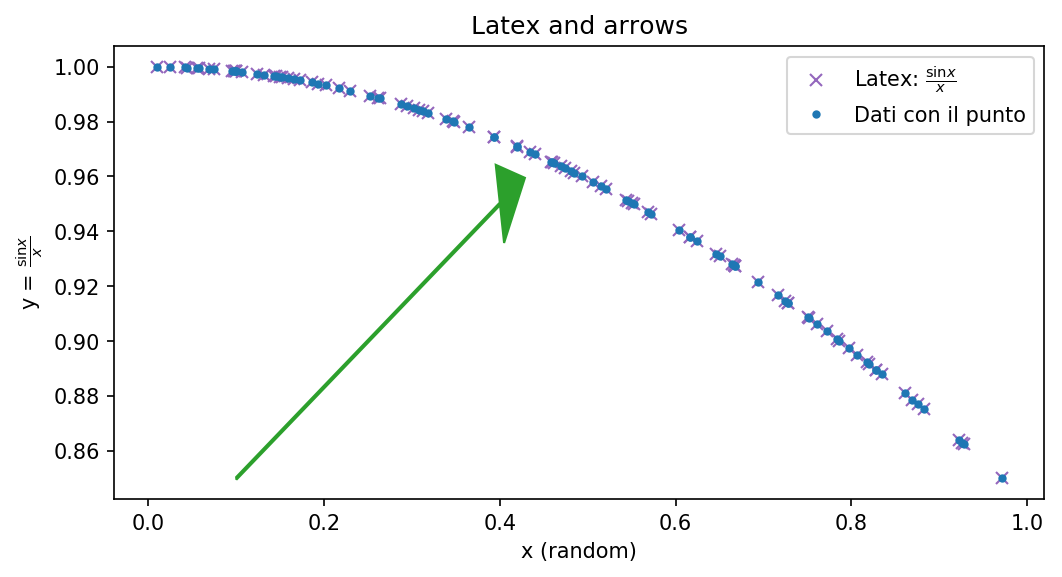

In [15]:
y = np.sin(x) / x

plt.plot(x, y, 'C4x', label='Latex: $\\frac{\\sin x}{x}$') 
plt.plot(x, y, '.', label='Dati con il punto')
# for the arrow: x, y, dx, dy
plt.arrow(0.1, 0.85, 0.3, 0.1, head_width=0.03, 
          head_length=0.03, fc='C2', ec='C2')

plt.title('Latex and arrows')
plt.xlabel('x (random)')
plt.ylabel('y = $\\frac{\\sin x}{x}$')
plt.legend();

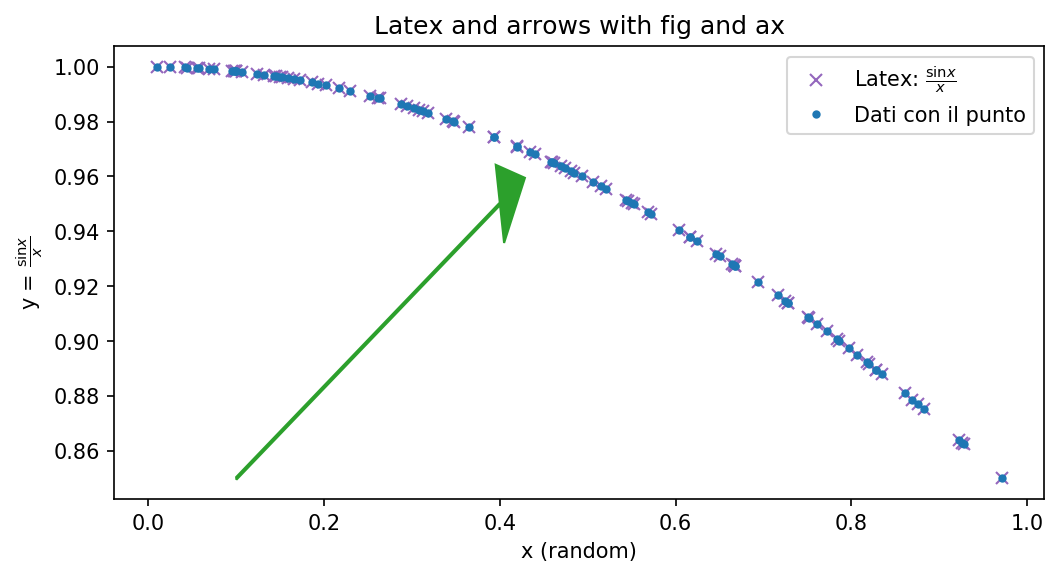

In [17]:
# Use and OO approach by plotting using fig and ax
fig, ax = plt.subplots()

ax.plot(x, y, 'C4x', label='Latex: $\\frac{\\sin x}{x}$')
ax.plot(x, y, '.', label='Dati con il punto')

ax.arrow(0.1, 0.85, 0.3, 0.1, head_width=0.03, 
          head_length=0.03, fc='C2', ec='C2')

ax.set_title('Latex and arrows with fig and ax')
ax.set_xlabel('x (random)')
ax.set_ylabel('y = $\\frac{\\sin x}{x}$')
ax.legend();

## Multiple plots

Let's see how to print an image with more that one plot. The idea is to defined a grid of subplots. There are different ways to create them

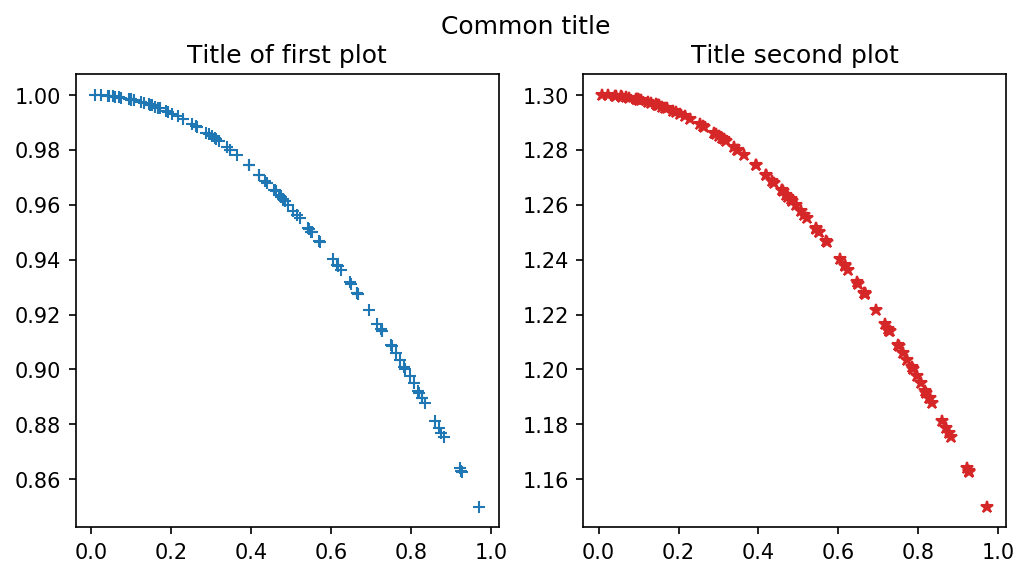

In [18]:
# Two plots: one of the left and one on the right. We need to 
# imagine to a grid of one row and two columns

# 1, 2, 1 to be read as: 1 row, 2 columns, 1 plot select from top-left
plt.subplot(1, 2, 1)
plt.plot(x, y, '+', label='first plot')
plt.title('Title of first plot')

plt.subplot(1, 2, 2) # 1 row, 2 columns, select plot 2
plt.plot(x, y + 0.3, 'C3*', label='Second plot')
plt.title('Title second plot')

plt.suptitle('Common title');

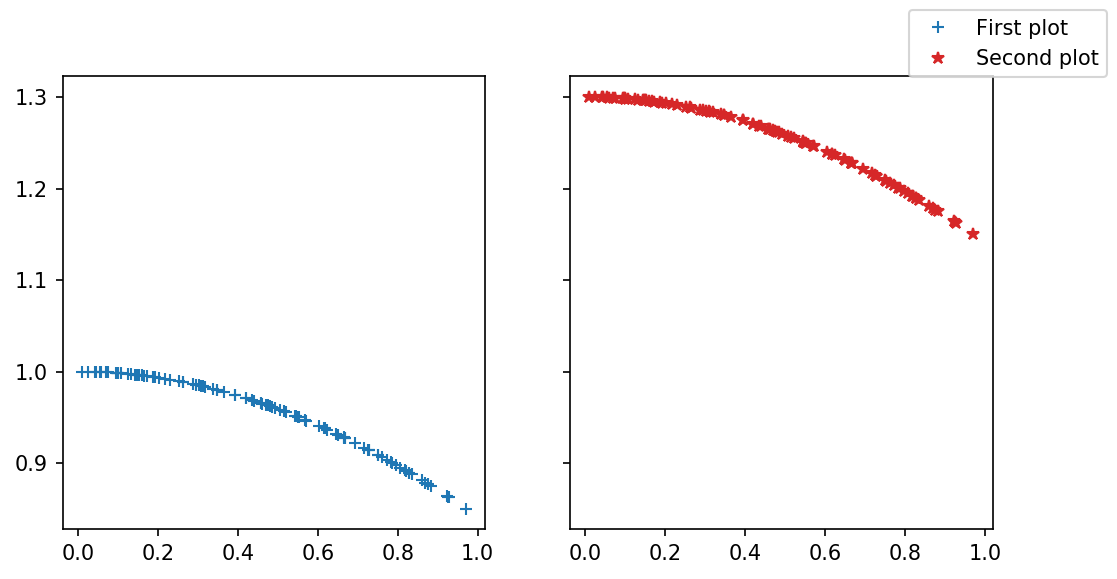

In [19]:
# Using fig and ax we get a numpy array of axes
# sharey=True is an example of putting a common y axes
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)  

axs[0].plot(x, y, '+', label='First plot')
axs[1].plot(x, y + 0.3, 'C3*', label='Second plot')

# apply a legend commond to all plots
fig.legend();

A more expanded example of subplots:

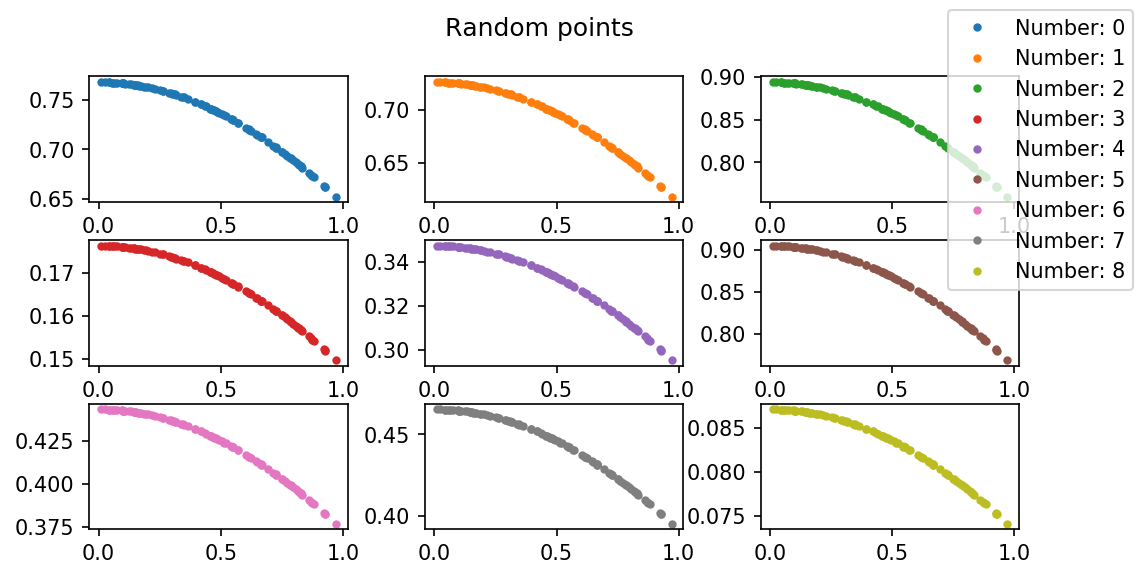

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.suptitle('Random points')

for index, ax in enumerate(fig.axes):
    ax.plot(x, y * np.random.random(), f'C{index}.', label='Number: {}'.format(index))
    
# wspace sistema la spaziatura orizzontale, hspace quella verticale
fig.subplots_adjust(wspace=0.3, hspace=0.3);
fig.legend()

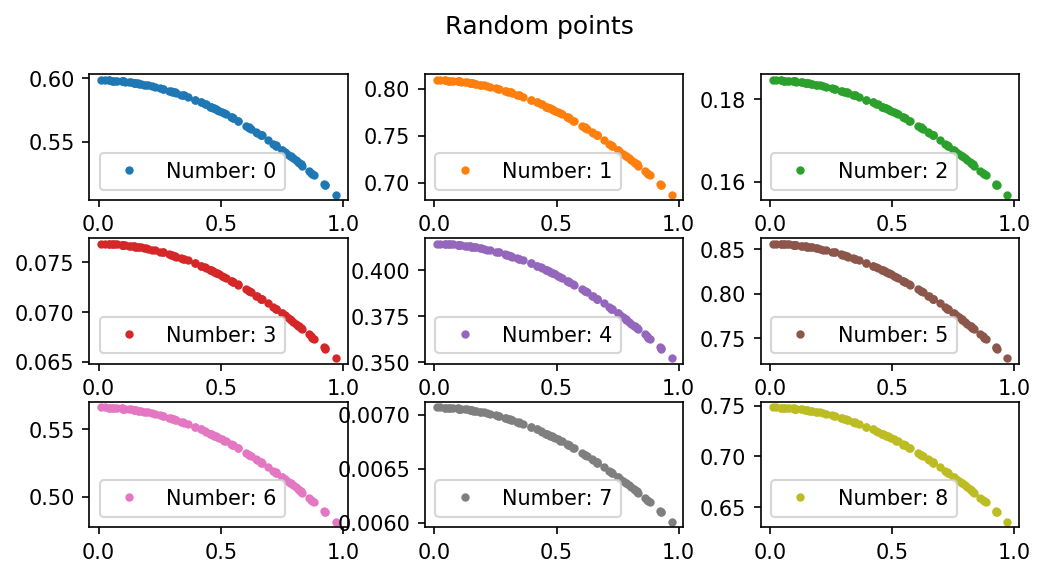

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.suptitle('Random points')

for index, ax in enumerate(fig.axes):
    ax.plot(x, y * np.random.random(), f'C{index}.', label='Number: {}'.format(index))
    ax.legend()
    
# wspace for width space and hspace for height space
fig.subplots_adjust(wspace=0.3, hspace=0.3);

## Saving a plot

Saving a plot is very easy. You just need to write the name of te file with the desired extension and matplotlib will take care of creating it.

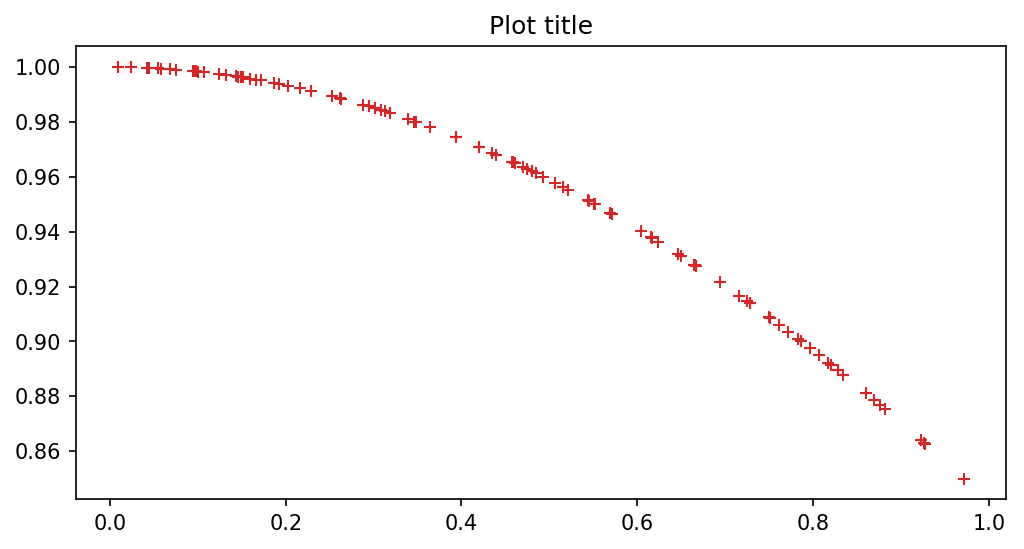

In [24]:
fig, ax = plt.subplots()
ax.plot(x, y, 'C3+')
ax.set_title('Plot title')

fig.savefig('saved_plot.pdf')
fig.savefig('saved_plot.png', transparent=True)
fig.savefig('saved_plot.svg')
fig.savefig('saved_plot.eps')

Vediamo che file sono stati creati nella cartella di lavoro del notebook:

In [25]:
!ls

Introduction.ipynb  numpy.ipynb   saved_plot.eps  saved_plot.png
matplotlib.ipynb    pandas.ipynb  saved_plot.pdf  saved_plot.svg


This is the result of a png plot just saved (included with markdown tags)
![](saved_plot.png)